In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer-churn-analysis.csv') 
pd.set_option('display.max_columns',None)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [3]:
#checking the shape of dataset
df.shape

(7043, 21)

In [4]:
#checking the columns of the dataset

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
#Checking for empty observations
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#Lets fill the empty observations with Nan

df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [9]:
#Lets check if there are Null values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [11]:
#Treating Missing values with mean Imputation Technique

df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

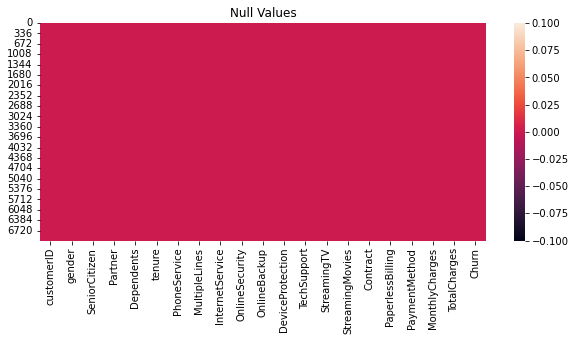

In [13]:
#Visualizeing null values

plt.figure(figsize=[10,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [14]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
df = df.drop(["customerID"],axis=1)

In [16]:
#Different types of variables are Categorical, ordinal, and numerical.

num_cols=["MonthlyCharges","TotalCharges","SeniorCitizen","tenure"]
cat_cols=["gender", "Partner", "Dependents", "PhoneService", "MultipleLines","OnlineSecurity",
          "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
         "PaperlessBilling","Churn","InternetService", "PaymentMethod","Contract"]

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


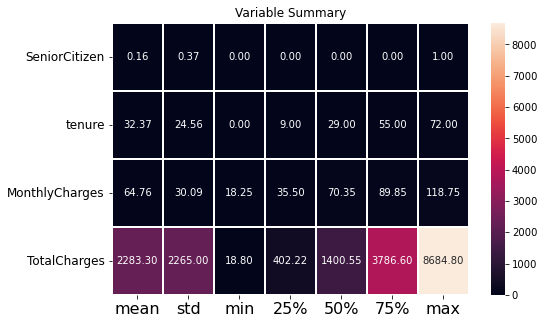

In [19]:
#Heatmap of the Describe function

plt.figure(figsize=(8,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

# Data Visualization
Univariate Analysis

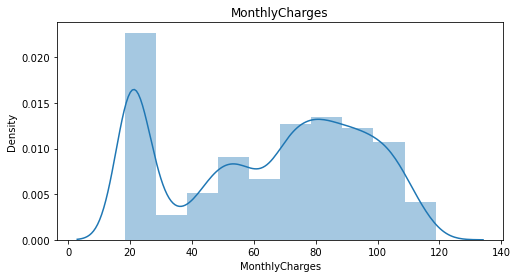

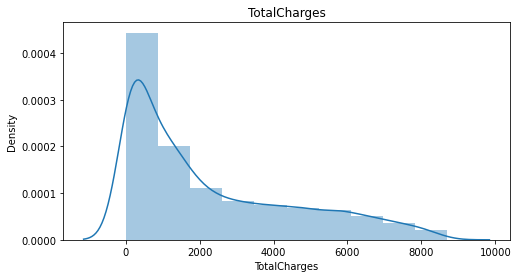

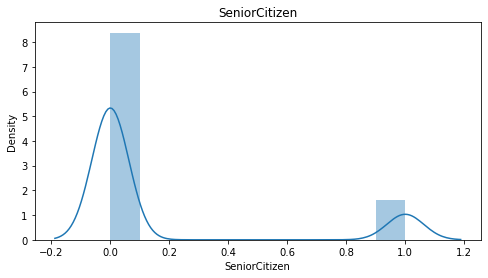

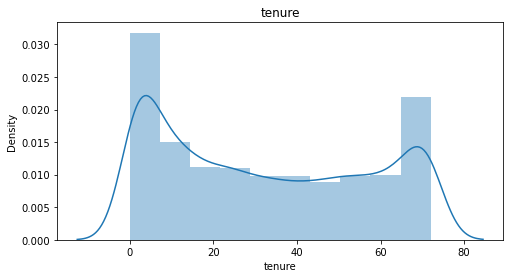

In [21]:
for i in df[num_cols]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()

In [22]:
gpd=["gender", "Partner", "Dependents","Churn"]
pmo=["PhoneService", "MultipleLines","OnlineSecurity","OnlineBackup"]
dts=["DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
bill=["PaperlessBilling","InternetService", "PaymentMethod","Contract"]

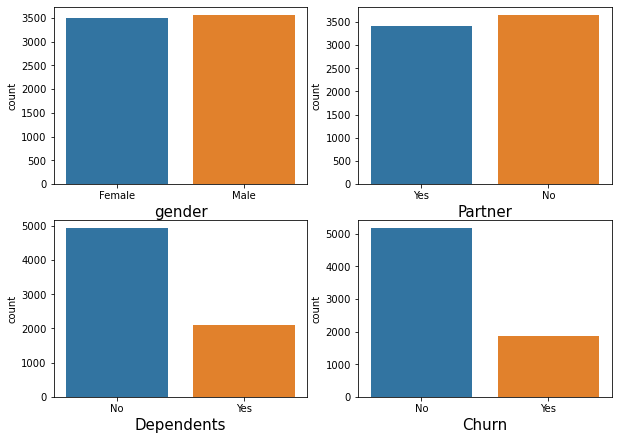

In [23]:
#the count of data for Categorical columns?

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for i in df[gpd]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()


In [24]:
for i in df[gpd]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

Male      3555
Female    3488
Name: gender, dtype: int64
**************
               
No     3641
Yes    3402
Name: Partner, dtype: int64
**************
               
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************
               
No     5174
Yes    1869
Name: Churn, dtype: int64
**************
               


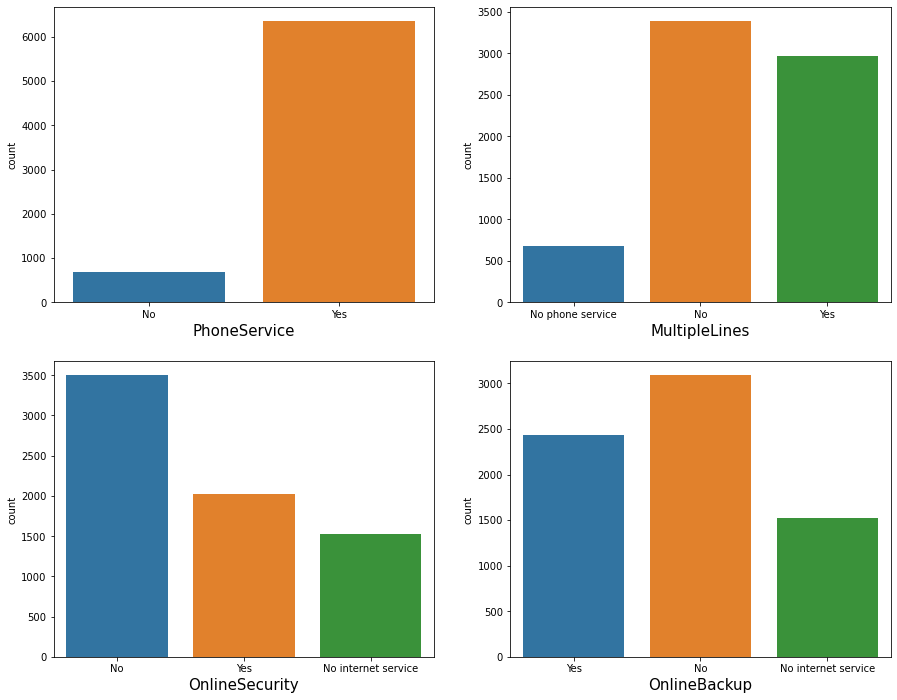

In [25]:
#the count of data for Categorical columns?

plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for i in df[pmo]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

In [26]:
#lets check the unique values in categorical columns

for i in df[pmo]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

Yes    6361
No      682
Name: PhoneService, dtype: int64
**************
               
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
**************
               
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
**************
               
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
**************
               


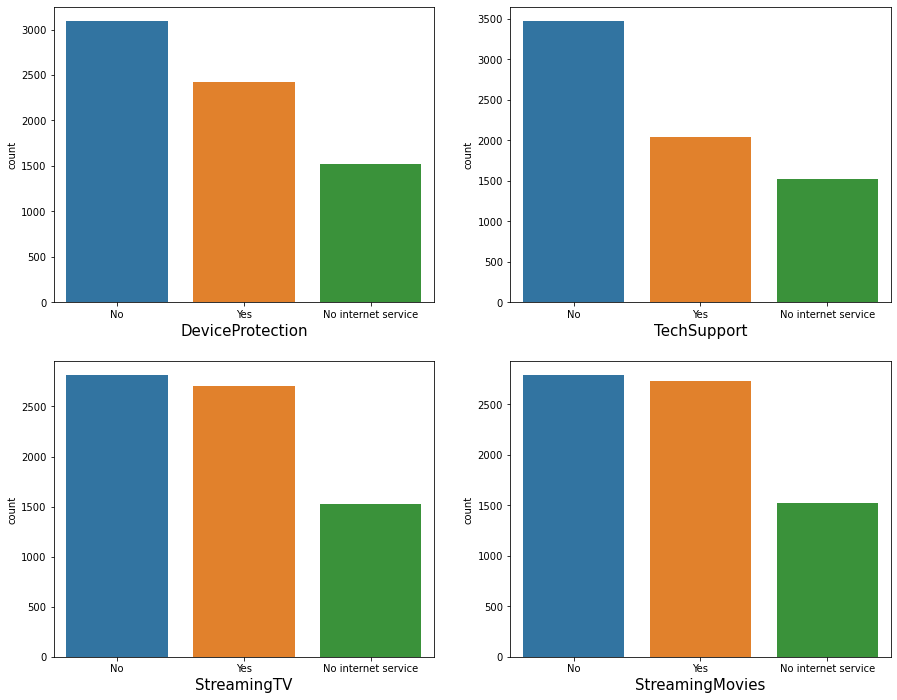

In [27]:
#the count of data for Categorical columns

plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for i in df[dts]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

In [28]:
for i in df[dts]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
**************
               
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
**************
               
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
**************
               
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
**************
               


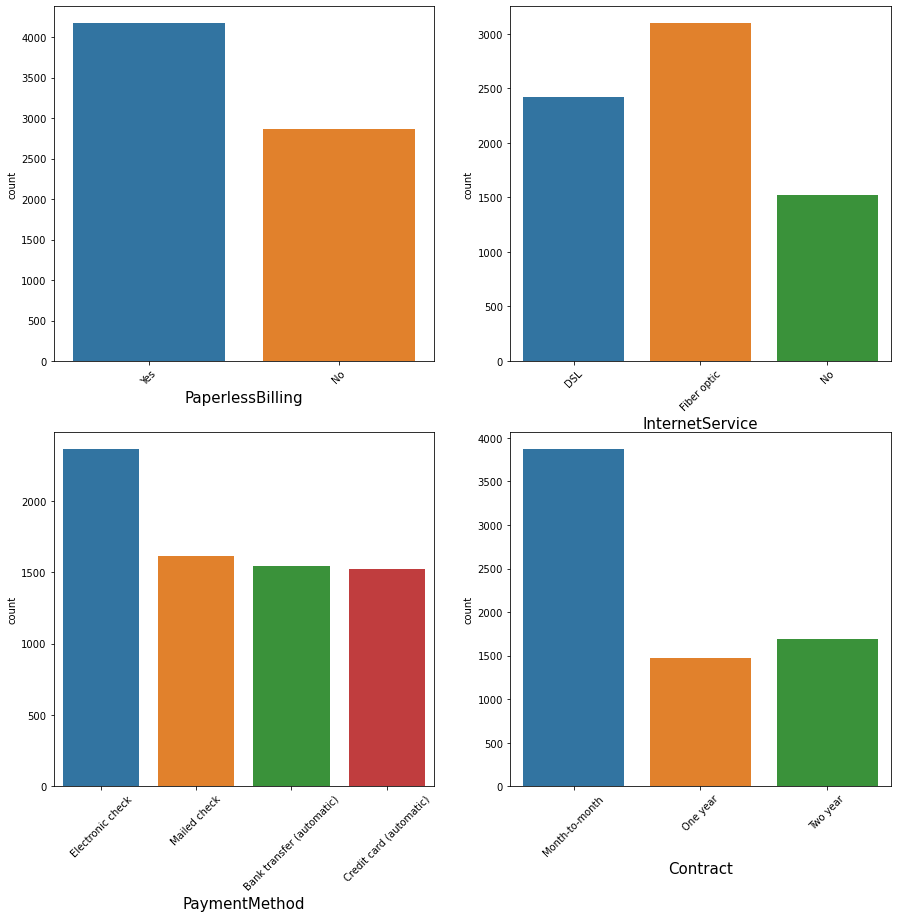

In [29]:
plt.figure(figsize=(15,30), facecolor='white')
plotnumber = 1

for i in df[bill]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
        plt.xticks(rotation=45)
       
    plotnumber+=1
plt.show()

In [30]:
for i in df[bill]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
**************
               
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
**************
               
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
**************
               
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
**************
               


# Bivariate Analysis

In [31]:
def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax)
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

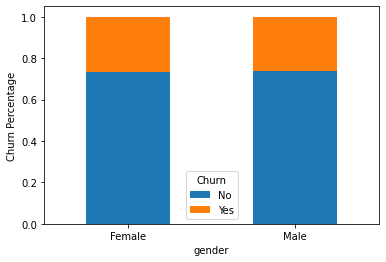

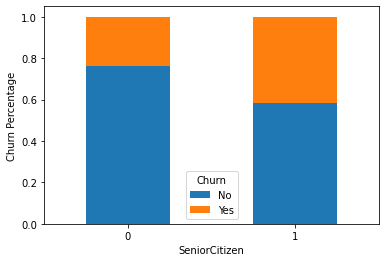

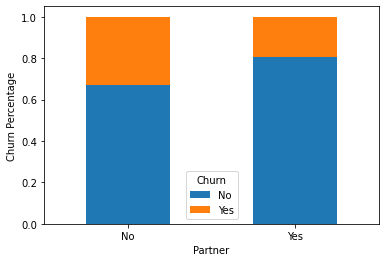

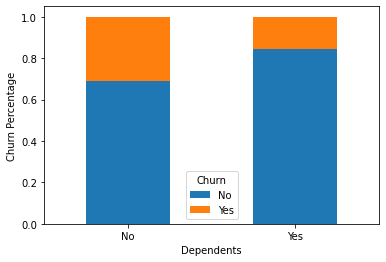

In [32]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

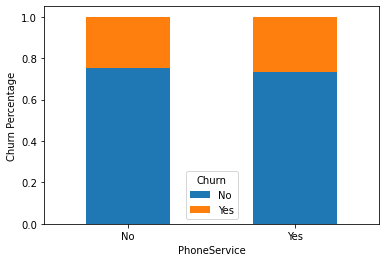

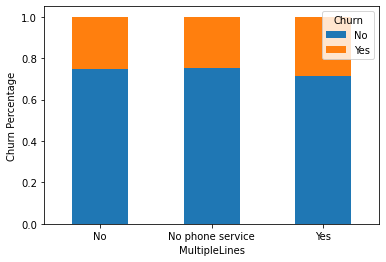

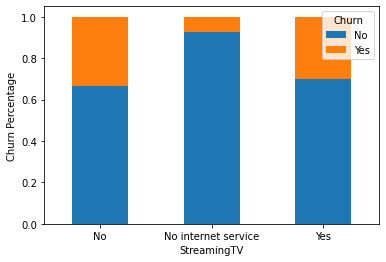

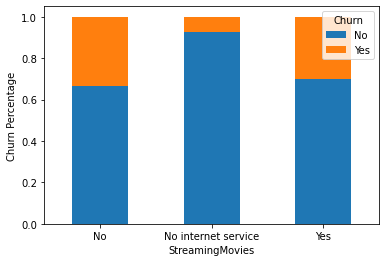

In [33]:
stacked_plot(df, "PhoneService", "Churn")
stacked_plot(df, "MultipleLines", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

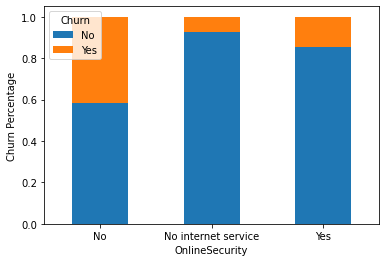

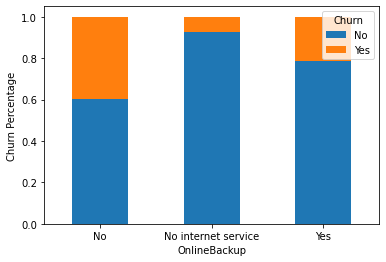

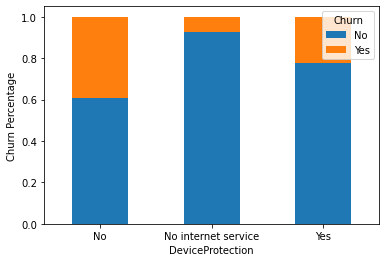

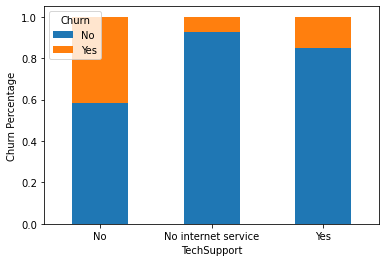

In [34]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")

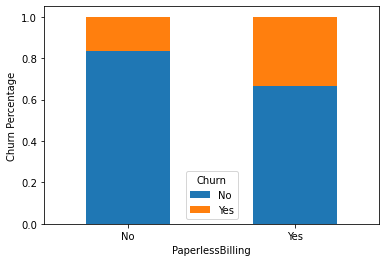

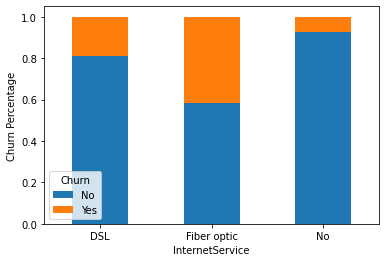

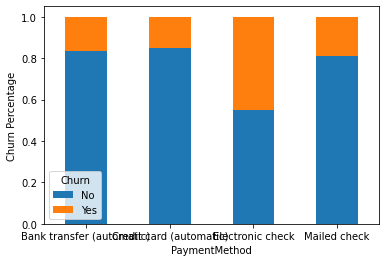

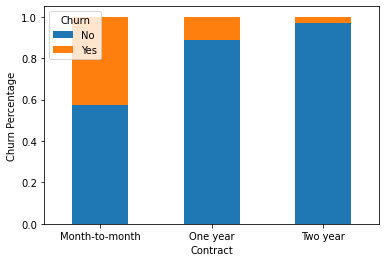

In [35]:
stacked_plot(df, "PaperlessBilling", "Churn")
stacked_plot(df, "InternetService", "Churn")
stacked_plot(df, "PaymentMethod", "Churn")
stacked_plot(df, "Contract", "Churn")

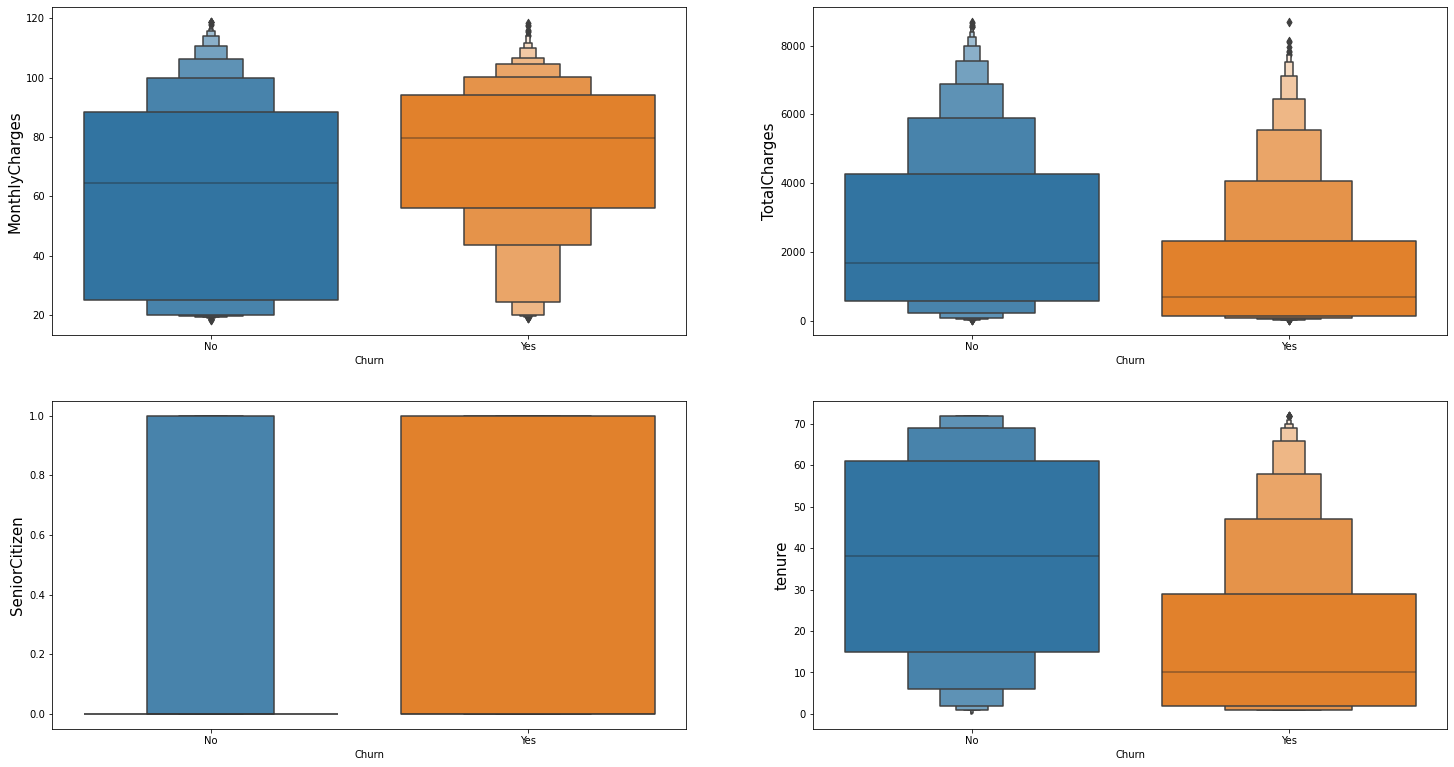

In [37]:
#lets check the numerical column and target relationship 

plt.figure(figsize=(25,35))
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(5,2,plotnumber)
        sns.boxenplot(x=df.Churn,y=df[i])
        plt.ylabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()


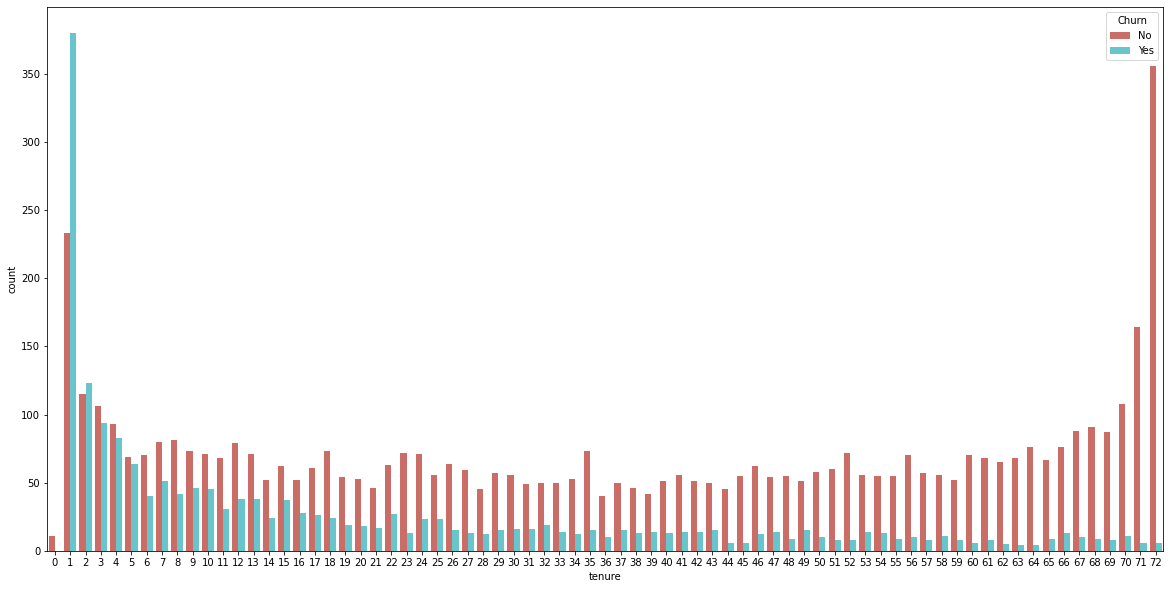

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x="tenure", hue="Churn",palette="hls",data=df)
plt.show()

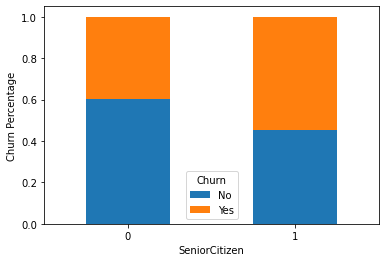

In [39]:
#Lets check senior citizen with contract and thier churn

stacked_plot(df[df.Contract == "Month-to-month"], "SeniorCitizen", "Churn")

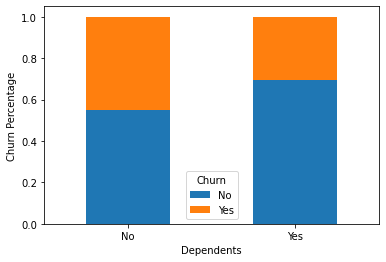

In [40]:
#lets check dependents and the internet service with churn

stacked_plot(df[df.InternetService == "Fiber optic"], "Dependents", "Churn")

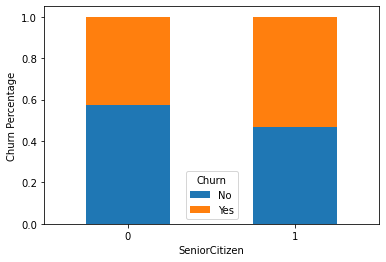

In [41]:
##Lets check payment method and senior citizen with churn

stacked_plot(df[df.PaymentMethod == "Electronic check"], "SeniorCitizen", "Churn")

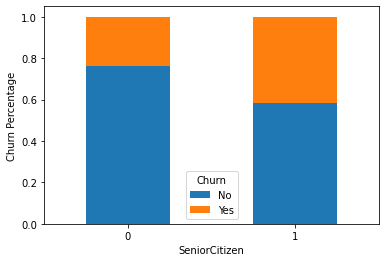

In [42]:
#lets check senior citizen with churn

stacked_plot(df, "SeniorCitizen", "Churn")

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

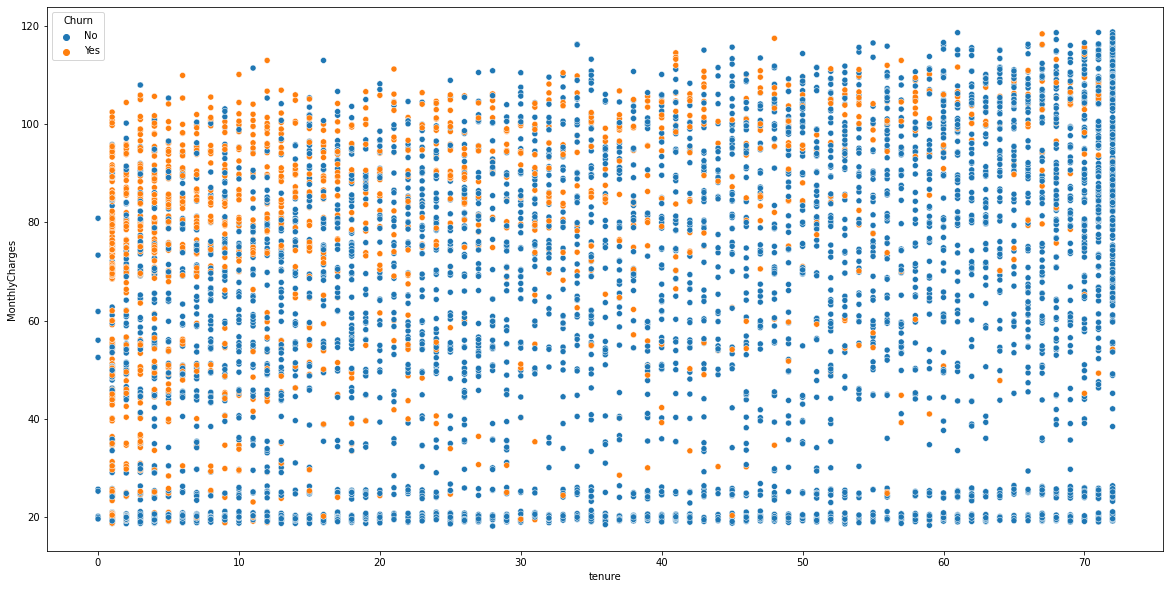

In [43]:
#lets check scatter plot of Monthly charges and tenure with churn

plt.figure(figsize=(20,10))
sns.scatterplot(df['tenure'],df['MonthlyCharges'],hue=df['Churn'])

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

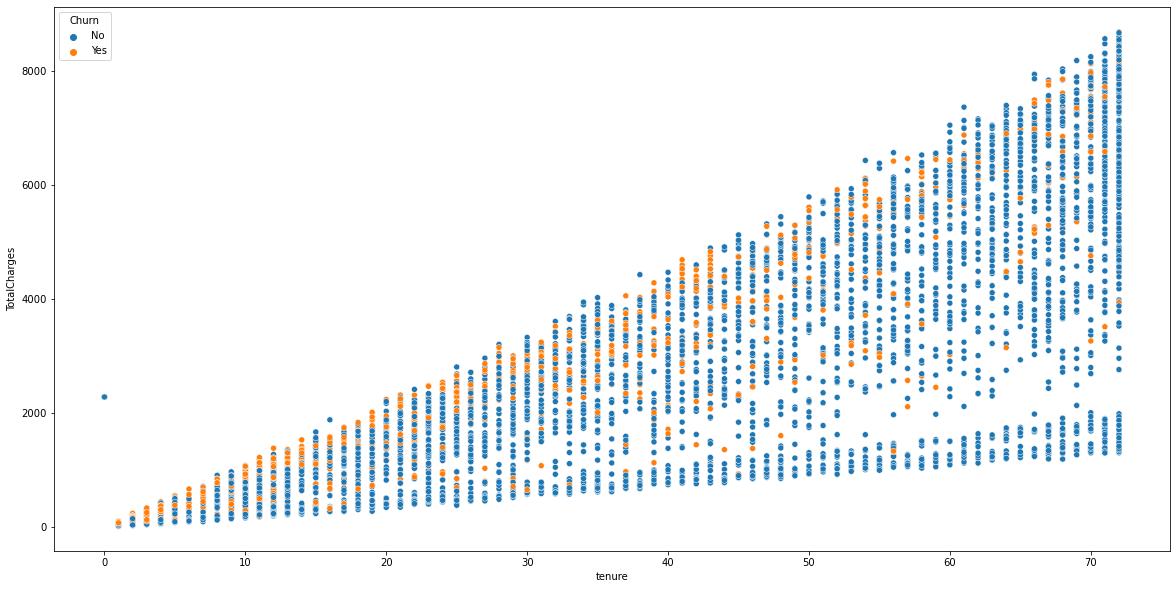

In [44]:
#lets check scatter plot of Total charges and tenure with churn

plt.figure(figsize=(20,10))
sns.scatterplot(df['tenure'],df['TotalCharges'],hue=df['Churn'])

# Multivariate Analysis

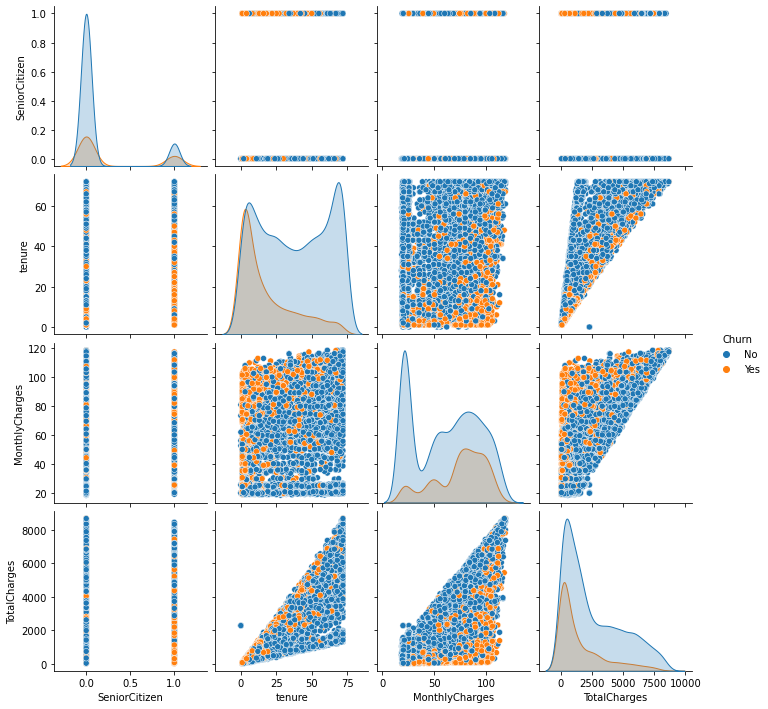

In [45]:
#pair ploting for target

sns.pairplot(df,hue="Churn")

# Data Cleaning and Feature Engineering

# Outliers

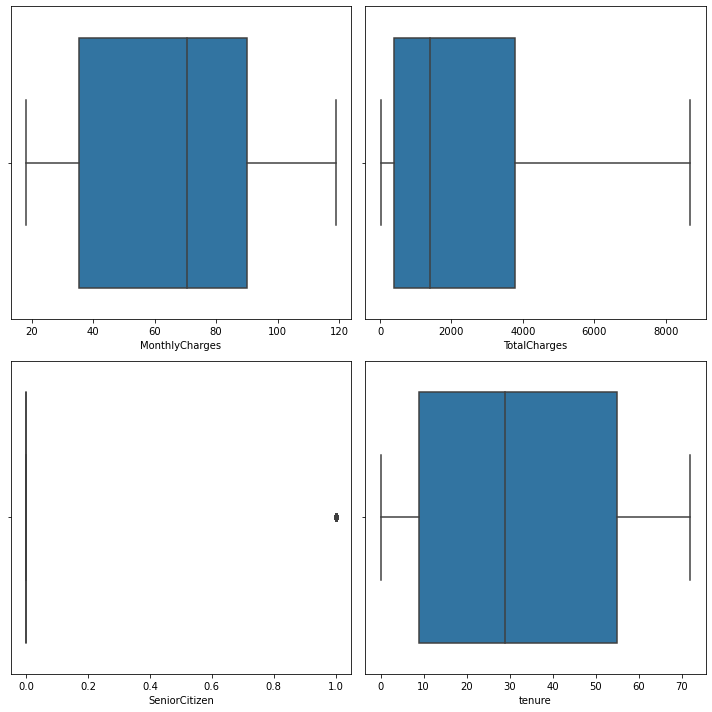

In [47]:
plt.figure(figsize=(10,10))
graph=1 

for column in num_cols:

    plt.subplot(2,2,graph)

    sns.boxplot(df[column],orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

# Skewnes

In [48]:
df.skew()


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [49]:
#Using Power transformer to remove skewness in TotalCharges

skew_cols=["TotalCharges"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew_cols] = scaler.fit_transform(df[skew_cols].values)

In [50]:
df.skew()


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

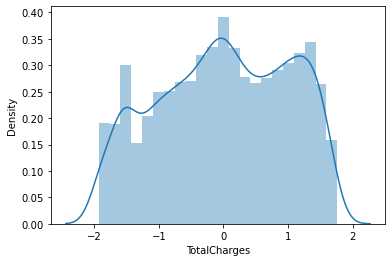

In [51]:
#check plot for Total charges now

sns.distplot(df['TotalCharges'])

# Encoding

In [52]:
# Separating categorical columns in df

cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [53]:
#Encoding using Ordinal encoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [54]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


In [55]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


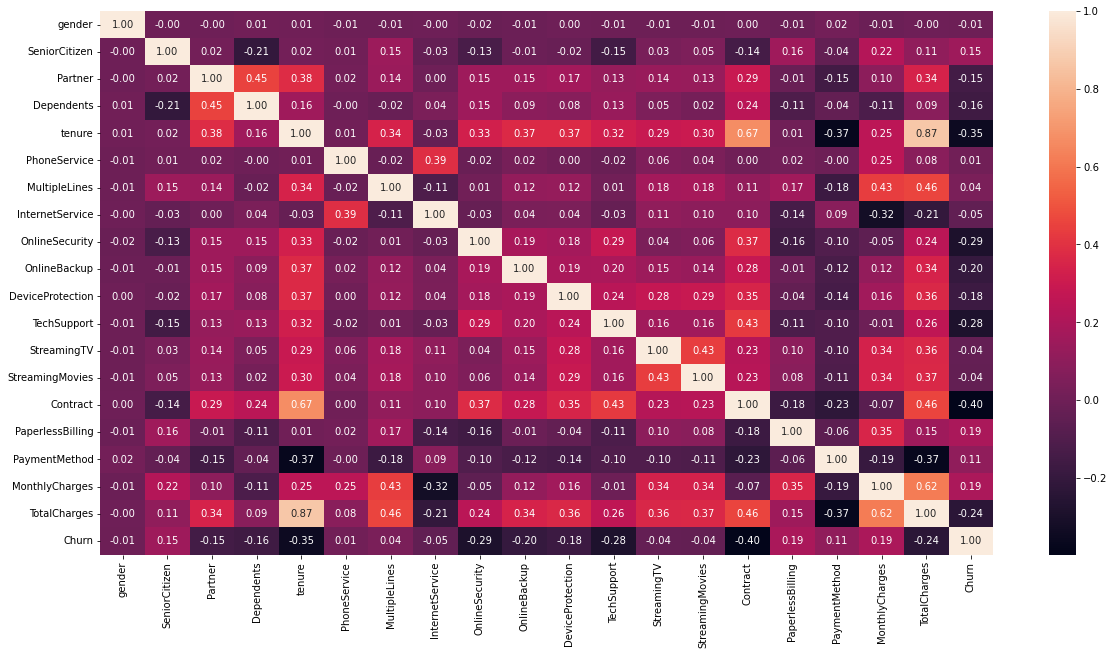

In [56]:
#Correlation Heat map

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

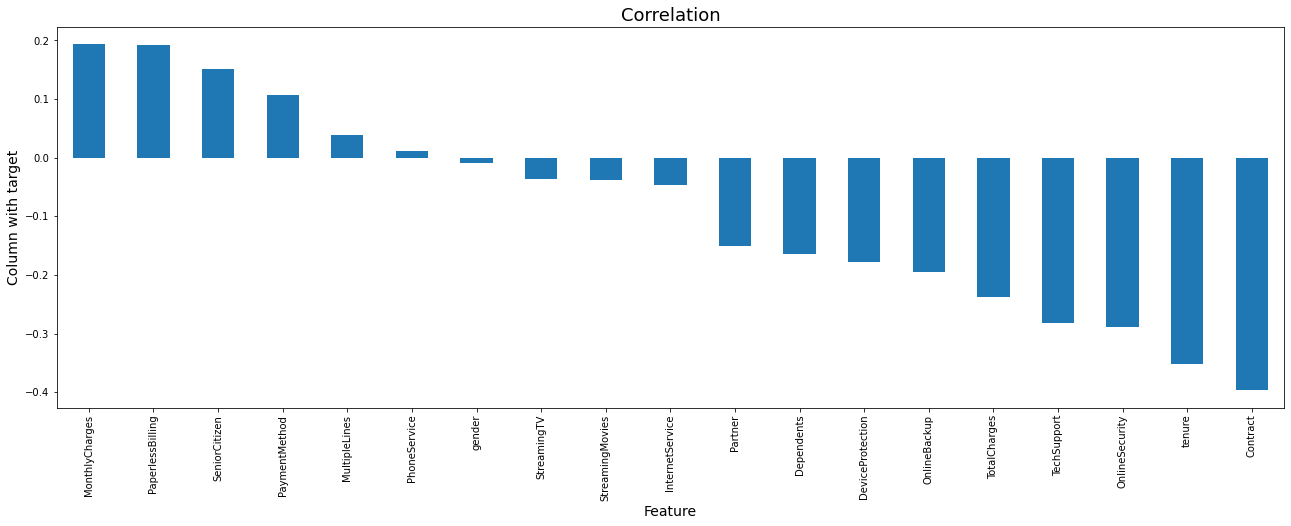

In [57]:
#Visualization of correlation:

plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

# Data splitting

In [58]:
x = df.drop("Churn",axis=1)
y = df["Churn"]
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118


In [59]:
x.shape


(7043, 19)

In [60]:
y.head()


0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [61]:
y.shape

(7043,)

# StandardScaler

In [62]:
#using Standard scaler to normalize the data

from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()

x= pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [63]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.250118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.295688
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.567097
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.859899
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.922968


# Multicollinearity

In [64]:
#Checking Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)


In [65]:
vif_calc()

    VIF Factor          features
0     1.001684            gender
1     1.149730     SeniorCitizen
2     1.463075           Partner
3     1.384396        Dependents
4    10.690305            tenure
5     1.622399      PhoneService
6     1.397403     MultipleLines
7     1.866643   InternetService
8     1.252550    OnlineSecurity
9     1.188767      OnlineBackup
10    1.284957  DeviceProtection
11    1.309099       TechSupport
12    1.444633       StreamingTV
13    1.443068   StreamingMovies
14    2.508121          Contract
15    1.203254  PaperlessBilling
16    1.181338     PaymentMethod
17    4.794140    MonthlyCharges
18   13.688514      TotalCharges


In [66]:
#Droping highly VIF column

x = x.drop(["TotalCharges"],axis=1)

In [67]:
vif_calc()

    VIF Factor          features
0     1.001684            gender
1     1.149639     SeniorCitizen
2     1.460856           Partner
3     1.382106        Dependents
4     2.754468            tenure
5     1.622282      PhoneService
6     1.391652     MultipleLines
7     1.825876   InternetService
8     1.247696    OnlineSecurity
9     1.185932      OnlineBackup
10    1.280152  DeviceProtection
11    1.303573       TechSupport
12    1.443671       StreamingTV
13    1.442276   StreamingMovies
14    2.459201          Contract
15    1.202918  PaperlessBilling
16    1.180664     PaymentMethod
17    2.733024    MonthlyCharges


# SMOTE

0.0    5174
1.0    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

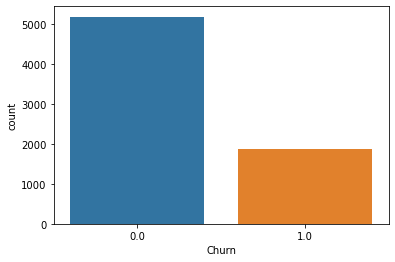

In [68]:
#Checking the count of Loan_Status

print(y.value_counts())
sns.countplot(y)

In [69]:
#Importing SMOTE and using it to balance

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

0.0    5174
1.0    5174
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

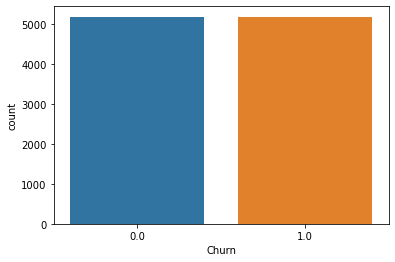

In [70]:
#Rechecking the count of Loan_Status

print(y.value_counts())
sns.countplot(y)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix, \
precision_score, f1_score, accuracy_score, classification_report

# Logistic Regression

In [72]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)


Best accuracy is  0.7906602254428341  on Random_state  74


In [73]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)


Best accuracy is  0.7906602254428341  on Random_state  74


In [74]:
#HyperParameter Tuning of LR

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

lr_grid_param={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty':['none', 'elasticnet', 'l1', 'l2'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100]}

gd_sr=GridSearchCV(estimator=lr,param_grid=lr_grid_param,cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.7746448493169236


In [75]:
lr=LogisticRegression(C=0.01,solver='newton-cg',penalty='l2')

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score of Logistic Regression is:
0.7893719806763285
[[1170  400]
 [ 254 1281]]
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      1570
         1.0       0.76      0.83      0.80      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



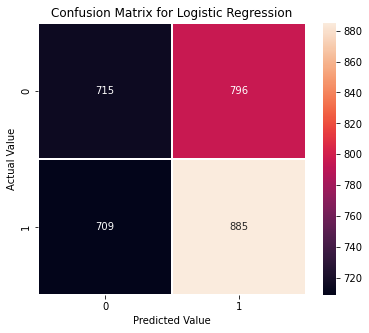

In [82]:
cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Decision Tree Classifier

In [77]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.807085346215781  on Random_state  29


In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8083735909822867
[[1219  292]
 [ 303 1291]]
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      1511
         1.0       0.82      0.81      0.81      1594

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



In [79]:
#HyperParameter Tuning for DTC

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

dtc= DecisionTreeClassifier()
dt_grid_param={'criterion':['gini','entropy'],
             'max_depth':np.arange(0,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30],'min_samples_leaf': [5, 10, 20, 50, 100]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=dt_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(gd_sr)
print(gd_sr.best_score_)
print(gd_sr.best_estimator_)
print(gd_sr.best_params_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')
0.7871144079965816
DecisionTreeClassifier(max_depth=7, max_features='log2', max_leaf_nodes=30,
                       min_samples_leaf=10)
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 30, 'min_samples_leaf': 10}


In [80]:
#Reinstating the tuned parameters:

dtc_H=DecisionTreeClassifier(criterion='gini',max_depth=36,max_features='auto',
                           max_leaf_nodes=30, min_samples_leaf=5)
dtc_H.fit(x_train,y_train)
dtc_H.score(x_train,y_train)
preddtc=dtc_H.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.7642512077294686
[[1182  329]
 [ 403 1191]]
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76      1511
         1.0       0.78      0.75      0.76      1594

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105



In [ ]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_dtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2,fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# Support Vector Classifier

In [83]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    sv=SVC()
    sv.fit(x_train, y_train)
    pred = sv.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8247987117552334  on Random_state  79


In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state = RS)

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [85]:
svmkernel('linear')

0.7819645732689211
[[1124  424]
 [ 253 1304]]
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77      1548
         1.0       0.75      0.84      0.79      1557

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



In [86]:
svmkernel('poly')

0.7948470209339774
[[1172  376]
 [ 261 1296]]
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      1548
         1.0       0.78      0.83      0.80      1557

    accuracy                           0.79      3105
   macro avg       0.80      0.79      0.79      3105
weighted avg       0.80      0.79      0.79      3105



In [87]:
svmkernel('rbf')

0.8247987117552334
[[1217  331]
 [ 213 1344]]
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      1548
         1.0       0.80      0.86      0.83      1557

    accuracy                           0.82      3105
   macro avg       0.83      0.82      0.82      3105
weighted avg       0.83      0.82      0.82      3105



In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

sv=SVC()
sv_grid_param={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

gd_sr=GridSearchCV(estimator=sv,param_grid=sv_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.8741845928976867


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=79)
svc_h=SVC(kernel='rbf',gamma=1,C=10)
svc_h.fit(x_train,y_train)
svc_h.score(x_train,y_train)
pred_svc=svc_h.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.863768115942029
[[1369  179]
 [ 244 1313]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1548
         1.0       0.88      0.84      0.86      1557

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



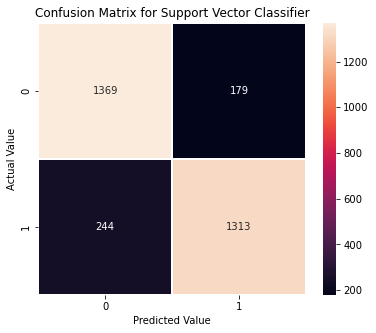

In [90]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_svc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# Random Forest Classifier

In [91]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.863768115942029  on Random_state  79


In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8657004830917875
[[1333  215]
 [ 202 1355]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1548
         1.0       0.86      0.87      0.87      1557

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

rf=RandomForestClassifier()
rf_grid_param={"max_features": [1,3,10],
                "min_samples_split":[2,3,5,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[200,300],
                "criterion":["gini",'entropy']}

gd_sr=GridSearchCV(estimator=rf,param_grid=rf_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
0.8577611532561414


In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =81)
rf_h=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=1,min_samples_split=3)
rf_h.fit(x_train,y_train)
rf_h.score(x_train,y_train)
predrf=rf_h.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8534621578099839
[[1308  207]
 [ 248 1342]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1515
         1.0       0.87      0.84      0.86      1590

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



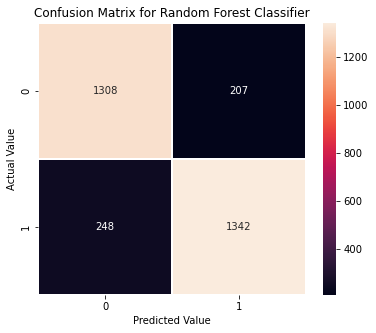

In [95]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2,fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# KNN Classifier


In [96]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7896940418679549  on Random_state  23


In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7896940418679549
[[1057  485]
 [ 168 1395]]
              precision    recall  f1-score   support

         0.0       0.86      0.69      0.76      1542
         1.0       0.74      0.89      0.81      1563

    accuracy                           0.79      3105
   macro avg       0.80      0.79      0.79      3105
weighted avg       0.80      0.79      0.79      3105



In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

knn=KNeighborsClassifier()
knn_grid_param={"n_neighbors": np.arange(1, 25, 2),
                "weights": ["uniform","distance"],
                'metric' : ['minkowski','euclidean','manhattan'],
                'algorithm':['auto','ball_tree','kd_tree','brute']}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.8371706558513881


In [99]:
knn_h=KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights='uniform',algorithm='auto')
knn_h.fit(x_train,y_train)
knn_h.score(x_train,y_train)
predknn=knn_h.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8154589371980676
[[1192  350]
 [ 223 1340]]
              precision    recall  f1-score   support

         0.0       0.84      0.77      0.81      1542
         1.0       0.79      0.86      0.82      1563

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



Text(0.5, 1.0, 'Confusion matrix')

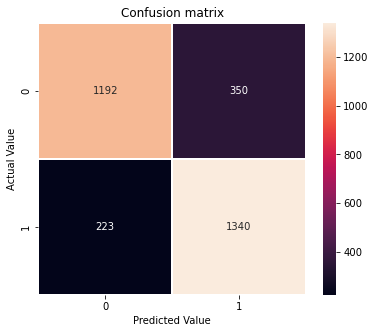

In [101]:
cm = confusion_matrix(y_test, predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2,fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion matrix')

# Gradient Boosting Classifier

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =None)

GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predgb=GBC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8450885668276973
Confusion Matrix: [[1280  284]
 [ 197 1344]]
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      1564
         1.0       0.83      0.87      0.85      1541

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.84      3105



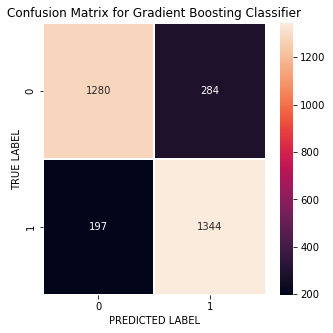

In [103]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2,fmt = ".0f", ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Cross Validation Score

In [104]:
score=cross_val_score(lr,x,y,cv=5)
score_a=score.mean()
print("Cross_Val_Score of LR:",score_a)

Cross_Val_Score of LR: 0.7741613372466337


In [105]:
score=cross_val_score(dtc,x,y,cv=5)
score_b=score.mean()
print("Cross_Val_Score of DTC:",score_b)

Cross_Val_Score of DTC: 0.7838327928028896


In [106]:
score=cross_val_score(svc_h,x,y,cv=5)
score_c=score.mean()
print("Cross_Val_Score of SVC:",score_c)


Cross_Val_Score of SVC: 0.8740870405783092


In [107]:
score=cross_val_score(rf_h,x,y,cv=5)
score_d=score.mean()
print("Cross_Val_Score of RF:",score_d)

Cross_Val_Score of RF: 0.8567946894926953


In [108]:
score=cross_val_score(knn_h,x,y,cv=5)
score_e=score.mean()
print("Cross_Val_Score of KNN:",score_e)

Cross_Val_Score of KNN: 0.8371706558513881


In [109]:
score=cross_val_score(GBC,x,y,cv=5)
score_f=score.mean()
print("Cross_Val_Score of Gradient Boosting:",score_f)

Cross_Val_Score of Gradient Boosting: 0.8337945704125543


Text(0.5, 1.0, 'Cross Validation Scores')

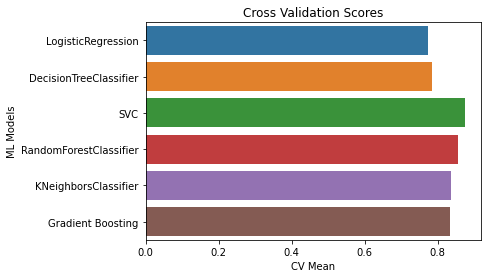

In [110]:
cv_result=[score_a,score_b,score_c,score_d,score_e,score_f]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier",
            "Gradient Boosting"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

# AUC ROC Curve 

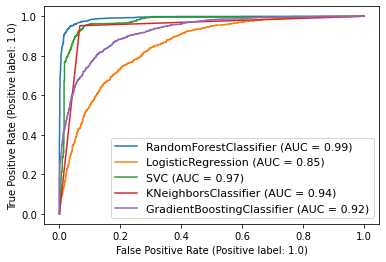

In [112]:
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf_h,x_test,y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)    
#plot_roc_curve(dtc,x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc_h, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn_h, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =81)

Final_Model=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=1,min_samples_split=3)
Final_Model.fit(x_train,y_train)
predrf=Final_Model.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8547504025764895
[[1317  198]
 [ 253 1337]]
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1515
         1.0       0.87      0.84      0.86      1590

    accuracy                           0.85      3105
   macro avg       0.85      0.86      0.85      3105
weighted avg       0.86      0.85      0.85      3105



In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob=Final_Model.predict_proba(x_test)[:,1]
y_pred_prob


array([0.07666667, 0.74666667, 0.255     , ..., 0.925     , 0.97333333,
       0.        ])

In [115]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)


In [116]:
fpr

array([0.        , 0.0019802 , 0.00264026, 0.00264026, 0.00462046,
       0.00462046, 0.00462046, 0.00528053, 0.00528053, 0.00594059,
       0.00660066, 0.00726073, 0.00726073, 0.00858086, 0.00858086,
       0.00858086, 0.00924092, 0.01056106, 0.01122112, 0.01188119,
       0.01188119, 0.01188119, 0.01188119, 0.01188119, 0.01188119,
       0.01254125, 0.01254125, 0.01254125, 0.01320132, 0.01386139,
       0.01386139, 0.01518152, 0.01584158, 0.01584158, 0.01584158,
       0.01584158, 0.01584158, 0.01584158, 0.01584158, 0.01584158,
       0.01650165, 0.01650165, 0.01650165, 0.01650165, 0.01650165,
       0.01650165, 0.01650165, 0.01650165, 0.01650165, 0.01650165,
       0.01650165, 0.01650165, 0.01650165, 0.01650165, 0.01650165,
       0.01782178, 0.01782178, 0.01848185, 0.01914191, 0.01980198,
       0.01980198, 0.02112211, 0.02112211, 0.02112211, 0.02112211,
       0.02178218, 0.02178218, 0.02244224, 0.02244224, 0.02244224,
       0.02244224, 0.02244224, 0.02310231, 0.02376238, 0.02442

In [117]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.98333333e-01, 9.96666667e-01,
       9.95000000e-01, 9.93333333e-01, 9.91666667e-01, 9.90000000e-01,
       9.88333333e-01, 9.86666667e-01, 9.85000000e-01, 9.83333333e-01,
       9.81666667e-01, 9.80000000e-01, 9.76666667e-01, 9.75000000e-01,
       9.73333333e-01, 9.71666667e-01, 9.70000000e-01, 9.68333333e-01,
       9.66666667e-01, 9.63333333e-01, 9.61666667e-01, 9.60000000e-01,
       9.58333333e-01, 9.56666667e-01, 9.55000000e-01, 9.53333333e-01,
       9.51666667e-01, 9.50000000e-01, 9.48333333e-01, 9.46666667e-01,
       9.45000000e-01, 9.43333333e-01, 9.41666667e-01, 9.40000000e-01,
       9.38333333e-01, 9.36666667e-01, 9.35000000e-01, 9.33333333e-01,
       9.31666667e-01, 9.30000000e-01, 9.28333333e-01, 9.26666667e-01,
       9.25000000e-01, 9.23333333e-01, 9.21666667e-01, 9.20000000e-01,
       9.18333333e-01, 9.15000000e-01, 9.13333333e-01, 9.11666667e-01,
       9.10000000e-01, 9.08333333e-01, 9.06666667e-01, 9.03333333e-01,
      

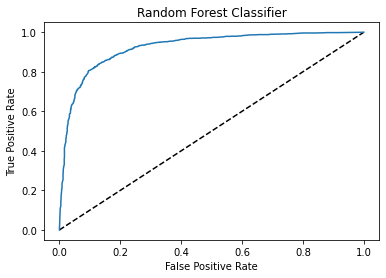

In [118]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [119]:
auc_score=roc_auc_score(y_test,Final_Model.predict(x_test))
print((auc_score)*100)

85.50937169188617


# Saving the Model 

In [120]:
import joblib
joblib.dump(Final_Model,'Customer_Churn_rf.pkl')

['Customer_Churn_rf.pkl']